# Decision Tree

Reduce the group's impurity after division

### Impure

#### Gini coefficient

At node t of the decision tree, the number n of samples in the node, and K classes in the node. Let a sample belonging to class i be (n_i). Let the proportion of samples belonging to class i be P(C_i|t).
$$
P(C_i|t) = \frac{n_i}{n} \\
I_G(t) = 1-\sum_{i=1}^{K}P(C_i|t)^2
$$

#### entropy coefficient

$$
I_H(t) = -\sum_{i=1}^{K}P(C_i|t)log P(C_i|t)
$$

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

## EDA and preprocessing

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Class'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
Class                False
dtype: bool

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


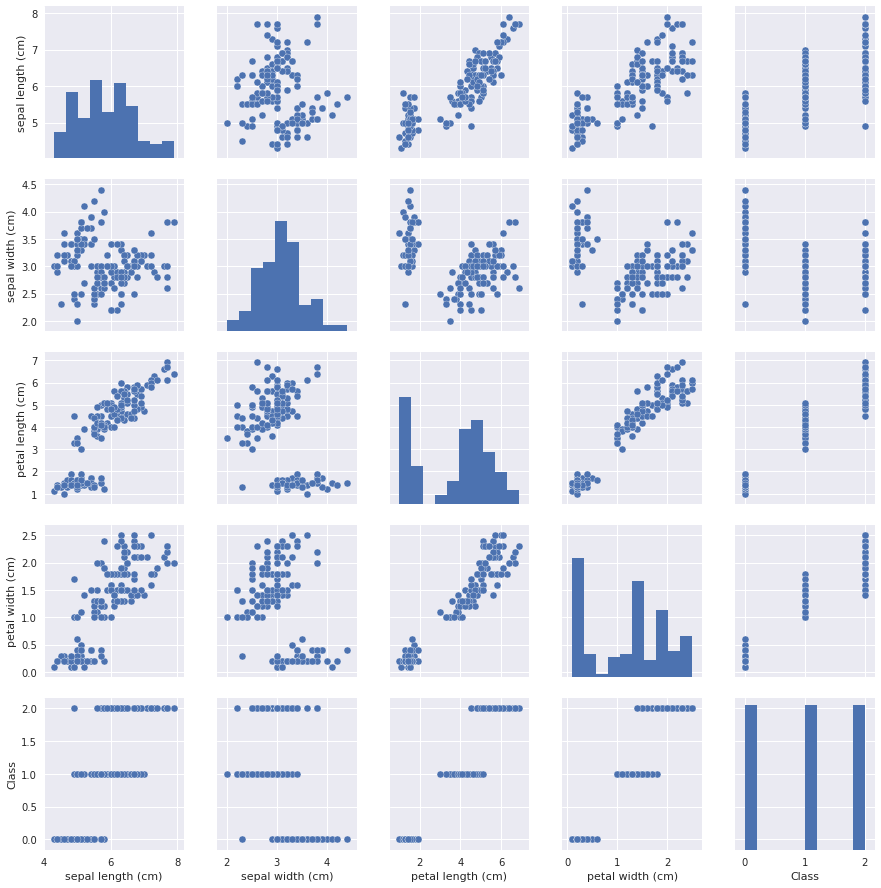

In [7]:
sns.pairplot(iris_df)

## Train and Test

In [8]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [10]:
dt_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [11]:
dt_pred = dt_clf.predict(X_test)
accuracy_score(y_test, dt_pred)

1.0

## Visualization

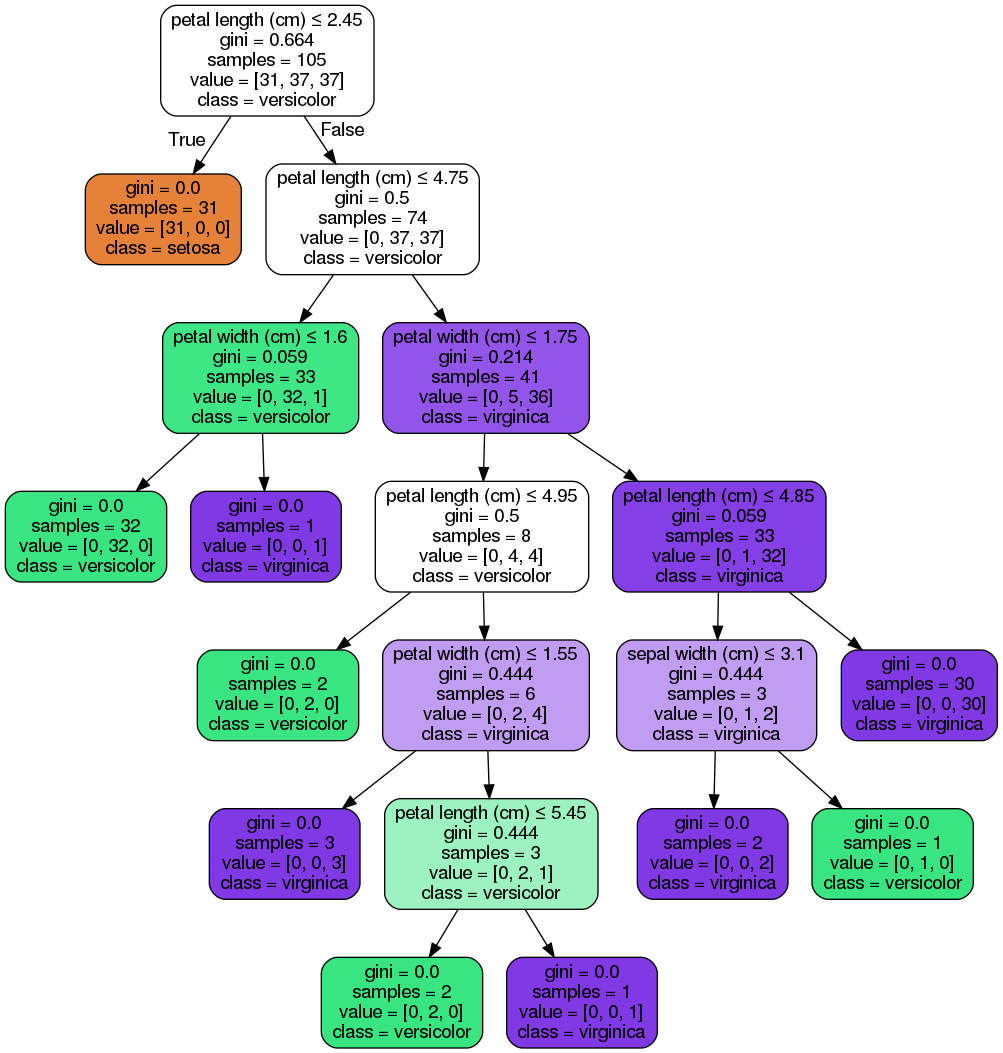

In [12]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(dt_clf, out_file=None, 
                     feature_names=iris.feature_names,
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

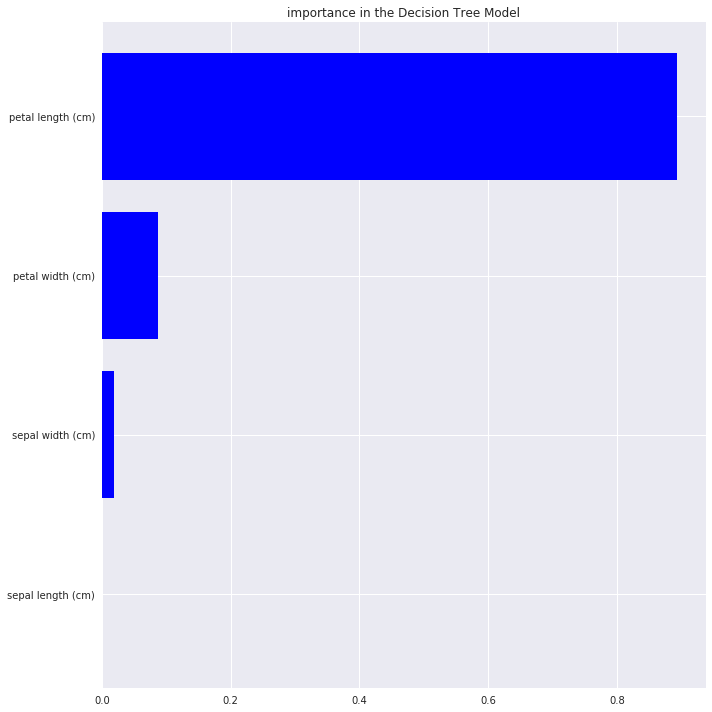

In [13]:
features = iris_df.drop(columns='Class')

plt.figure(figsize=(10,10))
features = features.columns
importances = dt_clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.title("importance in the Decision Tree Model")
plt.tight_layout(h_pad=7)
plt.show()

# Random Forest

Determined from the results of multiple decision trees.

Of the explanatory variables of training data, choose K at random and divide by the variable that can be divided best among the K.

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf_clf = RandomForestClassifier(criterion='gini', random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
rf_pred = dt_clf.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)

print('accuracy:', accuracy)

accuracy: 1.0


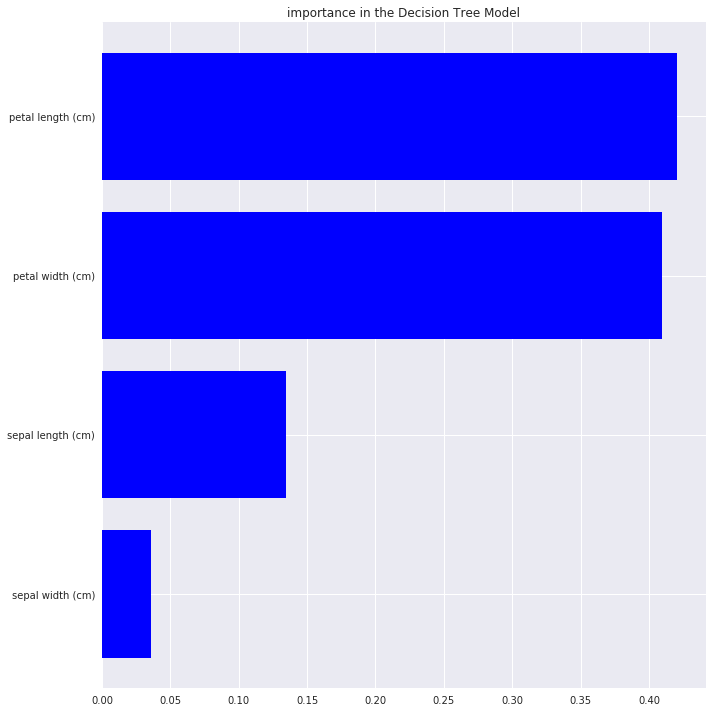

In [17]:
features = iris_df.drop(columns='Class')

plt.figure(figsize=(10,10))
features = features.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.title("importance in the Decision Tree Model")
plt.tight_layout(h_pad=7)
plt.show()